# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 2 - Singapore Housing Data and Kaggle Challenge

# Part 2

## 1) Importing Data and Data Overview

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle


# Set graph to sns style
sns.set()

# Set the option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Importing files from Part 1
train_cleaned = pd.read_csv('data/train_cleaned.csv')
num_index = ['hdb_age', 'floor_area_sqm', 'max_floor_lvl', 'sec_sch_nearest_dist']
cat_index = ['flat_type', 'storey_range', 'flat_model', 'full_flat_type', 'region']

In [3]:
train_cleaned.head()

,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,tranc_year,tranc_month,full_flat_type,hdb_age,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,hawker_nearest_distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,sec_sch_affiliation,region
0,4 ROOM,mid,90.0,Model A,680000.0,2016,5,4 ROOM Model A,15,25,0,0,0,0,142,1094.090418,154.753357,84,60,330.083069,0,0,1138.633422,78,1,1138.633422,224,0,Central
1,5 ROOM,low,130.0,Improved,665000.0,2012,7,5 ROOM Improved,34,9,0,0,0,0,112,866.941448,640.151925,80,77,903.659703,1,1,415.607357,45,1,447.894399,232,0,Central
2,EXECUTIVE,mid,144.0,Apartment,838000.0,2013,7,EXECUTIVE Apartment,24,16,0,0,0,0,90,1459.579948,1762.082341,84,95,1334.251197,1,0,498.849039,39,0,180.074558,188,0,West
3,4 ROOM,low,103.0,Model A,550000.0,2012,4,4 ROOM Model A,29,11,1,0,0,0,75,950.175199,726.215262,32,86,907.453484,1,1,389.515528,20,1,389.515528,253,1,Central
4,4 ROOM,low,83.0,Simplified,298000.0,2017,12,4 ROOM Simplified,34,4,0,0,0,0,48,729.771895,1540.151439,45,0,412.343032,0,0,401.200584,74,0,312.025435,208,0,North


## 2) Modeling

### Train_Test_Split
- Train_Test_Split allows you to split your dataset into training and testing sets for machine learning. The purpose of splitting the data is to have separate sets for training the model and evaluating its performance on unseen data.

In [4]:
# Split your data into features (X) and target (y)
X = train_cleaned.drop(columns=['resale_price'])
y = train_cleaned['resale_price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numerical and categorical features
numeric_features = num_index
categorical_features = cat_index

### Feature Engineering

### One Hot Encoding and Scaling
- One Hot Encoding is used to convert categorical variables into a numerical representation so that they can be used as input for machine learning algorithms. Categorical variables are those that represent discrete categories or labels.
- Standard Scaling, also known as Z-score normalization, scales the data such that the mean of the feature becomes 0 and the standard deviation becomes 1. This transformation brings all the features onto the same scale, centered around 0, with a standard deviation of 1. 

In [5]:
# One hot encode the categorical features using pd.get_dummies
X_train_encoded = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[categorical_features], drop_first=True)

# Reindex the testing set to match the columns in the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Apply StandardScaler to the numerical features in both the training and testing sets
scaler = StandardScaler()
X_train_encoded[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_encoded[numeric_features] = scaler.transform(X_test[numeric_features])

# Now, X_train_encoded and X_test_encoded contain the one hot encoded and standardized features for the training and testing sets, respectively.
X_train_sc = X_train_encoded
X_test_sc = X_test_encoded

# The selected columns from 'num_index' and 'cat_index' have been used to create X_train_sc and X_test_sc.

In [6]:
print(X_train_sc.shape)
X_train_sc.head()

(105443, 79)


,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,storey_range_low,storey_range_mid,storey_range_ultrahigh,storey_range_veryhigh,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,full_flat_type_2 ROOM 2-room,full_flat_type_2 ROOM DBSS,full_flat_type_2 ROOM Improved,full_flat_type_2 ROOM Model A,full_flat_type_2 ROOM Premium Apartment,full_flat_type_2 ROOM Standard,full_flat_type_3 ROOM DBSS,full_flat_type_3 ROOM Improved,full_flat_type_3 ROOM Model A,full_flat_type_3 ROOM New Generation,full_flat_type_3 ROOM Premium Apartment,full_flat_type_3 ROOM Simplified,full_flat_type_3 ROOM Standard,full_flat_type_3 ROOM Terrace,full_flat_type_4 ROOM Adjoined flat,full_flat_type_4 ROOM DBSS,full_flat_type_4 ROOM Improved,full_flat_type_4 ROOM Model A,full_flat_type_4 ROOM Model A2,full_flat_type_4 ROOM New Generation,full_flat_type_4 ROOM Premium Apartment,full_flat_type_4 ROOM Premium Apartment Loft,full_flat_type_4 ROOM Simplified,full_flat_type_4 ROOM Standard,full_flat_type_4 ROOM Terrace,full_flat_type_4 ROOM Type S1,full_flat_type_5 ROOM Adjoined flat,full_flat_type_5 ROOM DBSS,full_flat_type_5 ROOM Improved,full_flat_type_5 ROOM Improved-Maisonette,full_flat_type_5 ROOM Model A,full_flat_type_5 ROOM Model A-Maisonette,full_flat_type_5 ROOM Premium Apartment,full_flat_type_5 ROOM Premium Apartment Loft,full_flat_type_5 ROOM Standard,full_flat_type_5 ROOM Type S2,full_flat_type_EXECUTIVE Adjoined flat,full_flat_type_EXECUTIVE Apartment,full_flat_type_EXECUTIVE Maisonette,full_flat_type_EXECUTIVE Premium Apartment,full_flat_type_EXECUTIVE Premium Maisonette,full_flat_type_MULTI-GENERATION Multi Generation,region_East,region_North,region_North-East,region_West,hdb_age,floor_area_sqm,max_floor_lvl,sec_sch_nearest_dist
9509,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.523504,-1.282397,0.137305,-0.011662
72510,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.781344,-1.241408,-0.343176,0.837455
79362,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.538053,0.931010,-0.503336,-0.671746
120303,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.616419,-0.257671,-1.784617,-0.267184
66702,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.276117,-0.954485,-0.183015,-0.182677


In [7]:
print(X_test_sc.shape)
X_test_sc.head()

(45191, 79)


,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,storey_range_low,storey_range_mid,storey_range_ultrahigh,storey_range_veryhigh,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,full_flat_type_2 ROOM 2-room,full_flat_type_2 ROOM DBSS,full_flat_type_2 ROOM Improved,full_flat_type_2 ROOM Model A,full_flat_type_2 ROOM Premium Apartment,full_flat_type_2 ROOM Standard,full_flat_type_3 ROOM DBSS,full_flat_type_3 ROOM Improved,full_flat_type_3 ROOM Model A,full_flat_type_3 ROOM New Generation,full_flat_type_3 ROOM Premium Apartment,full_flat_type_3 ROOM Simplified,full_flat_type_3 ROOM Standard,full_flat_type_3 ROOM Terrace,full_flat_type_4 ROOM Adjoined flat,full_flat_type_4 ROOM DBSS,full_flat_type_4 ROOM Improved,full_flat_type_4 ROOM Model A,full_flat_type_4 ROOM Model A2,full_flat_type_4 ROOM New Generation,full_flat_type_4 ROOM Premium Apartment,full_flat_type_4 ROOM Premium Apartment Loft,full_flat_type_4 ROOM Simplified,full_flat_type_4 ROOM Standard,full_flat_type_4 ROOM Terrace,full_flat_type_4 ROOM Type S1,full_flat_type_5 ROOM Adjoined flat,full_flat_type_5 ROOM DBSS,full_flat_type_5 ROOM Improved,full_flat_type_5 ROOM Improved-Maisonette,full_flat_type_5 ROOM Model A,full_flat_type_5 ROOM Model A-Maisonette,full_flat_type_5 ROOM Premium Apartment,full_flat_type_5 ROOM Premium Apartment Loft,full_flat_type_5 ROOM Standard,full_flat_type_5 ROOM Type S2,full_flat_type_EXECUTIVE Adjoined flat,full_flat_type_EXECUTIVE Apartment,full_flat_type_EXECUTIVE Maisonette,full_flat_type_EXECUTIVE Premium Apartment,full_flat_type_EXECUTIVE Premium Maisonette,full_flat_type_MULTI-GENERATION Multi Generation,region_East,region_North,region_North-East,region_West,hdb_age,floor_area_sqm,max_floor_lvl,sec_sch_nearest_dist
107690,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.620515,-0.298660,-0.022855,-0.442200
100411,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.538053,1.012988,0.137305,-0.744207
23295,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.043279,1.955736,-0.343176,0.289227
68880,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.358580,-1.323386,0.137305,1.174624
88677,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.043279,1.135956,-0.343176,-0.354833


From the provided information, we can conclude the following:

- Dataset Size:
The training dataset (X_train_sc) contains 120,505 samples (rows).
The testing dataset (X_test_sc) contains 30,127 samples (rows).

- Number of Features:
Both the training and testing datasets have 100 features (columns).
Each feature represents a different input variable used for modeling.

### Baseline Scores

In [8]:
train_cleaned['y_mean']=train_cleaned['resale_price'].mean()

In [9]:
# Calculate SSE
SSE = np.sum(np.square(train_cleaned['resale_price']- train_cleaned['y_mean']))
print(f"The Sum of Squared Errors is: {round(SSE,2)}.")

The Sum of Squared Errors is: 3093559037337274.0.


In [10]:
# Calculate MSE
MSE = np.mean(np.square(train_cleaned['resale_price']- train_cleaned['y_mean']))
print(f"The Mean Squared Error is: {round(MSE,2)}.")

The Mean Squared Error is: 20536924182.7.


In [11]:
# Calculate RMSE
RMSE = (np.mean(np.square(train_cleaned['resale_price']- train_cleaned['y_mean']))) ** 0.5
print(f"The Root Mean Squared Error is: {round(RMSE,2)}.")

The Root Mean Squared Error is: 143307.1.


In [12]:
# Drop y_mean
train_cleaned.drop(['y_mean'], axis=1, inplace=True)

Overall, the baseline scores suggest that the model's predictions have a considerable amount of error, and there is room for improvement in its performance. It is essential to compare these baseline scores with the scores of other models or techniques to see if the model is performing better than a simple average or constant prediction.

The following will be the steps taken to improve the model's performance, I will be trying different regression algorithms, feature engineering, feature selection, hyperparameter tuning, and cross-validation techniques. 

#### Cross validation
---

Use `cross_val_score` to evaluate all three models.

In [13]:
lr = LinearRegression()
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [14]:
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=3)
lr_scores.mean()

-28382369973421.652

In [15]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.7855527210304091

In [16]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

0.7819266577894481

From the scores provided, we can make the following conclusions:

- Linear Regression (lr_scores): 
Such a large negative score indicates that the linear regression model is not appropriate for the data and is not capturing the underlying relationships effectively.

- Ridge Regression (ridge_scores):
The ridge regression model is performing better than linear regression. It is capturing some of the patterns and relationships in the data, and the predictions are closer to the actual target values.

- Lasso Regression (lasso_scores):
Like ridge regression, there is still room for improvement, but it appears to be a better fit than linear regression.

Overall, both ridge regression and lasso regression are providing better results compared to linear regression, as their mean scores are positive and closer to 1. 

## 3) Regression Models

#### Linear Regression

In [17]:
# Instantiation
lr = LinearRegression()

# Data Fitting
lr.fit(X_train_sc, y_train)
yhat = lr.predict(X_test_sc)

# Metrics Evaluation (Training data from training set)
print("Training Score: ", cross_val_score(lr, X_train_sc, y_train).mean())
print("Training RMSE: ", mean_squared_error(lr.predict(X_train_sc), y_train)**0.5)

#Validation score and validation rsme based on testing data from training set
print("Testing Score: ", r2_score(yhat, y_test))
print("Testing RMSE: ", mean_squared_error(yhat, y_test)**0.5)

Training Score:  -1.952397065239856e+17
Training RMSE:  66478.5861547999
Testing Score:  0.7257860331466526
Testing RMSE:  66267.51894794422


It appears that the training score is significantly lower than the testing score, and the training RMSE is extremely large compared to the testing RMSE. Such results indicate that the model is overfitting to the training data.

Given the training score's exceedingly large negative value, it is likely that there is a severe issue with the model's fitting process. This could be due to a variety of reasons, such as incorrect data preprocessing, feature selection, or hyperparameter tuning.

Overall, the current results indicate that the linear regression model is not suitable for the data, and further investigation and improvement are necessary to build a reliable predictive model.

#### Ridge Regression

In [18]:
# Instantiation
ridge = RidgeCV(alphas=np.logspace(-3, 3, 100))

# Data Fitting
ridge.fit(X_train_sc, y_train)

# Get the optimal alpha parameter
optimal_alpha = ridge.alpha_
print("Optimal Alpha:", optimal_alpha)
ridge = Ridge(alpha=optimal_alpha)

# Data Refitting
ridge.fit(X_train_sc, y_train)

# Metrics Evaluation (Training data from training set)
print("Training Score: ", cross_val_score(ridge, X_train_sc, y_train, cv=10).mean())
print("Training RMSE: ", mean_squared_error(ridge.predict(X_train_sc), y_train)**0.5)

yhat = ridge.predict(X_test_sc)

#Validation score and validation rsme based on testing data from training set
print("Testing Score: ", r2_score(yhat, y_test))
print("Testing RMSE: ", mean_squared_error(yhat, y_test)**0.5)

Optimal Alpha: 0.1747528400007685
Training Score:  0.7856253509393017
Training RMSE:  66471.63245266474
Testing Score:  0.7256032009141606
Testing RMSE:  66261.39747288992


The Ridge regression model appears to be performing well based on the provided metrics.
The Ridge regression model introduces a regularization term to the linear regression, which helps prevent overfitting and improves the model's generalization ability. Based on the provided metrics, the Ridge model is a good fit for the data and is performing well in predicting the target variable.

#### Lasso Regression

In [19]:
# Instantiation
lasso = LassoCV(n_alphas=500, cv=10, verbose=1)

# Data Fitting
lasso.fit(X_train_sc, y_train)

# Get the optimal alpha parameter
optimal_alpha = lasso.alpha_
print("Optimal Alpha:", optimal_alpha)
lasso = Lasso(alpha=optimal_alpha)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal Alpha: 93.81814060299982


In [20]:
# Data Refitting
lasso.fit(X_train_sc, y_train)
yhat = lasso.predict(X_test_sc)

# Metrics Evaluation (Training data from training set)
print("Training Score: ", cross_val_score(lasso, X_train_sc, y_train, cv=10).mean())
print("Training RMSE: ", mean_squared_error(lasso.predict(X_train_sc), y_train)**0.5)

#Validation score and validation rsme based on testing data from training set
print("Testing Score: ", r2_score(yhat, y_test))
print("Testing RMSE: ", mean_squared_error(yhat, y_test)**0.5)

Training Score:  0.7819099849802236
Training RMSE:  67053.58789363941
Testing Score:  0.7140184207945703
Testing RMSE:  66937.96854184674


Comparing the two models, we can see that Ridge Regression outperforms Lasso Regression in terms of both R^2 scores and RMSE values on both the training and testing data. Ridge Regression's optimal alpha of 1 indicates that it uses regularization to control overfitting, and this regularization seems to provide better generalization to unseen data compared to Lasso Regression. The performance difference is relatively small, but Ridge Regression appears to be a slightly better choice for predicting the resale prices in this scenario.

#### Training the Model (RidgeCV Model)

In [21]:
#Training the model

# Instantiation
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], store_cv_values=True)

# Data Fitting
ridge.fit(X_train_sc, y_train)

# Metrics Evaluation
print("Training Score: ", cross_val_score(ridge, X_train_sc, y_train).mean())
print("Training RMSE: ", mean_squared_error(ridge.predict(X_train_sc), y_train)**0.5)

Training Score:  0.7856235445888927
Training RMSE:  66471.61978262413


In [22]:
ridge_coefs = pd.DataFrame({'variable':X_train_sc.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs.head(10)

,variable,coef,abs_coef
26,flat_model_Terrace,202804.874269,202804.874269
72,region_North,-163727.475909,163727.475909
74,region_West,-145775.272283,145775.272283
53,full_flat_type_4 ROOM Terrace,127054.562534,127054.562534
73,region_North-East,-115215.037181,115215.037181
13,flat_model_Improved,-107847.409220,107847.409220
71,region_East,-87856.900242,87856.900242
3,flat_type_5 ROOM,79064.460620,79064.460620
76,floor_area_sqm,78215.195638,78215.195638
42,full_flat_type_3 ROOM Terrace,75750.311735,75750.311735


## 4) Inferential Visualizations (Model Analysis)

In [23]:
# Generate predictions on our training data
pred = ridge.predict(X_train_sc)

# Calculate residuals
residuals = y_train - pred

# Show statistics for residuals
residuals.describe()

count    1.054430e+05
mean    -9.971863e-12
std      6.647193e+04
min     -4.459105e+05
25%     -4.380680e+04
50%     -4.735316e+03
75%      3.699424e+04
max      4.591528e+05
Name: resale_price, dtype: float64

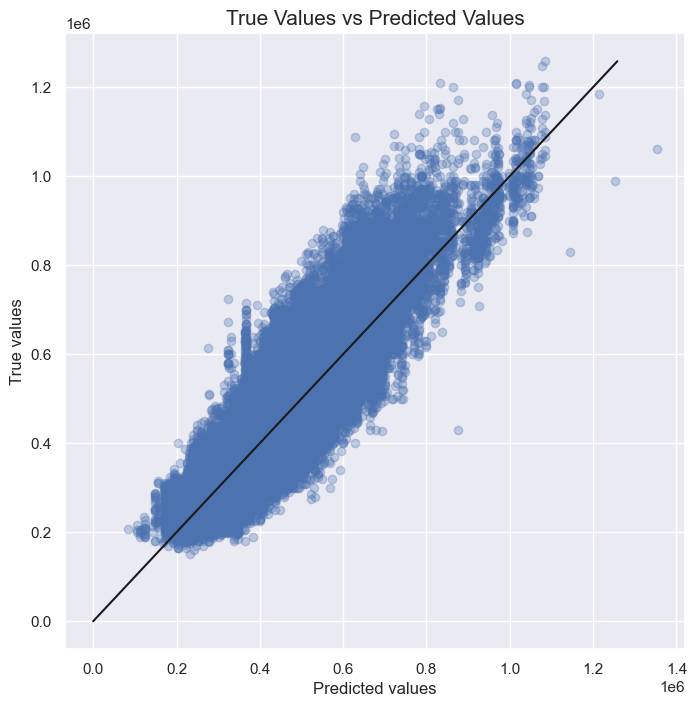

In [24]:
# Plots true values against our predictions
plt.figure(figsize=(8,8))
plt.scatter(pred, y_train, alpha=0.3)
plt.xlabel('Predicted values')
plt.ylabel('True values')

# Plots y=x line
plt.title('True Values vs Predicted Values', fontsize=15)
plt.plot([0,np.max(y_train)],[0,np.max(y_train)], c='k');

Based on the statistics of the residuals from the Ridge Regression model:

- The mean of the residuals is very close to zero, which suggests that, on average, the model's predictions are unbiased and have minimal bias in either direction.
- The standard deviation of the residuals is relatively high, indicating a fair amount of variability in the model's predictions around the true target values. This could be attributed to either inherent noise in the data or limitations in the model's ability to capture complex relationships.
- The minimum and maximum residuals indicate that the model makes predictions that range from being substantially below the actual values (negative residuals) to substantially above the actual values (positive residuals).
- The 25th and 75th percentiles of the residuals show the spread of the data around the median, suggesting that the majority of the residuals fall within a certain range, while some extreme values are present on both ends.

In conclusion, the Ridge Regression model seems to capture the general patterns in the data, as indicated by the mean of the residuals being close to zero and the relatively good performance metrics (Training RMSE and Testing Score). However, the presence of large residuals and a relatively high standard deviation indicates that there may be some degree of error or unexplained variance in the model's predictions. Further analysis and refinement of the model might be necessary to improve its predictive accuracy. Additionally, it's crucial to evaluate the model's performance on unseen data to assess its generalization ability.

# Save the Model using Pickle

In [25]:
# Save the model to a file
with open('ridgecv_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

In [26]:
# Save the scaler to a file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)